In [2]:
import pandas as pd
import numpy as np

# import clean data
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv"
df = pd.read_csv(path)

In [3]:
df.to_csv('module_5_auto.csv')

In [4]:
# First, let's only use numeric data
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [5]:
# Libraries for plotting
!pip install ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [34]:
# Functions for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width=12
    height=10
    plt.figure(figsize=(width,height))
    
    ax1=sns.distplot(RedFunction, hist=False, color='r', label=RedName)
    ax2=sns.distplot(BlueFunction, hist=False, color='b', label=BlueName, ax=ax1)
    
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    
    plt.show()
    plt.close()

In [7]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    width=12
    height=10
    plt.figure(figsize=(width, height))
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
    
    xmax=max([xtrain.values.max(), xtest.values.max()])
    xmin=min([xtrain.values.min(), xtest.values.min()])
    x=np.arange(xmin, xmax, 0.1)
    
    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [8]:
# Part 1: Training and Testing
y_data = df['price']

x_data=df.drop('price',axis=1)

In [9]:
# we split our data into training and testing data using the function train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x_data,y_data,test_size=0.10,random_state=1)

print("number of samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of samples: 21
number of training samples: 180


In [10]:
# Question 1
x_train1, x_test1, y_train1, y_test1=train_test_split(x_data, y_data, test_size=0.40, random_state=0)
print("number of samples:", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of samples: 81
number of training samples: 120


In [11]:
# Let's import LinearRegression from the module linear_model
from sklearn.linear_model import LinearRegression
lre=LinearRegression()

In [12]:
# We fit the model using the feature "horsepower"
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [13]:
# Let's calculate the R^2 on the test data:
lre.score(x_test[['horsepower']], y_test)

0.3635875575078824

In [14]:
# R^2 for training data
lre.score(x_train[['horsepower']], y_train)

0.6619724197515103

In [16]:
# Question 2
x_train1, x_test1, y_train1, y_test1=train_test_split(x_data, y_data, test_size=0.40, random_state=0)
lre.fit(x_train1[['horsepower']], y_train1)
lre.score(x_test1[['horsepower']], y_test1)

0.7139364665406973

In [17]:
# Cross-Validation
from sklearn.model_selection import cross_val_score
Rcross=cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [18]:
# The default scoring is R^2. Each element in the array has the average R^2 value for the fold:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [19]:
# We can calculate the average and stadard deviation of our estimate:
print("The mean of the folds are", Rcross.mean(), "standard deviation is", Rcross.std())

The mean of the folds are 0.522009915042119 standard deviation is 0.2911839444756029


In [23]:
# Question 3
Rcross1=cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
Rcross1.mean()

0.5166761697127429

In [25]:
# you can also use the function 'cross_val_predict' to predict the output. 
from sklearn.model_selection import cross_val_predict
yhat=cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
yhat[:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [26]:
# Part 2: Overfitting, Underfitting and Model Selection
lr=LinearRegression()
lr.fit(x_train[['horsepower','curb-weight','engine-size','highway-mpg']],y_train)

LinearRegression()

In [27]:
#Prediction using training data
yhat_train=lr.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [28]:
#Prediction using test data
yhat_test=lr.predict(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [29]:
# Let's perform some model evaluation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

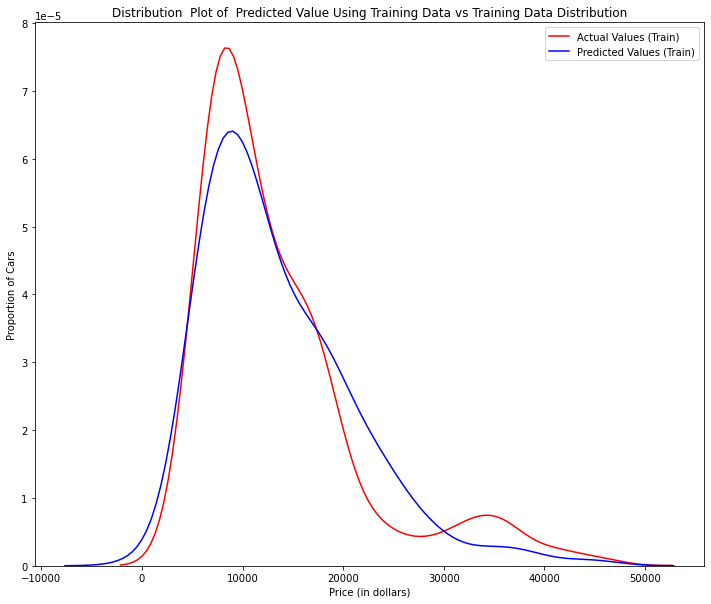

In [35]:
# Let's examine the distribution of the predicted values of the training  data.
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

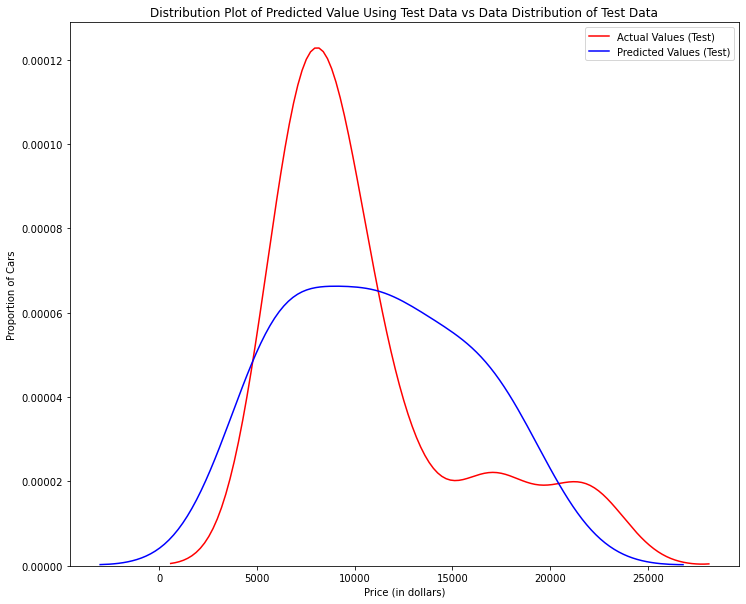

In [36]:
Title="Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data"
DistributionPlot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [37]:
#Let's see polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [38]:
#Overfitting
#Let's create a degree 5 polynomial model
#Let's use %55 of the data for training and the rest for testing.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [39]:
#We will perform a degree 5 polynomial transformation on the feature 'horsepower'
pr=PolynomialFeatures(degree=5)
x_train_pr=pr.fit_transform(x_train[['horsepower']])
x_test_pr=pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [40]:
#Let's create a Linear Regression model "poly" and train it
poly=LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression()

In [41]:
#We can see the output of our model using the method "predict"
yhat=poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.77492727,  7308.09738048, 12213.83912148, 18893.06269972,
       19995.73316497])

In [44]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.77492727  7308.09738048 12213.83912148 18893.06269972]
True values: [ 6295. 10698. 13860. 13499.]


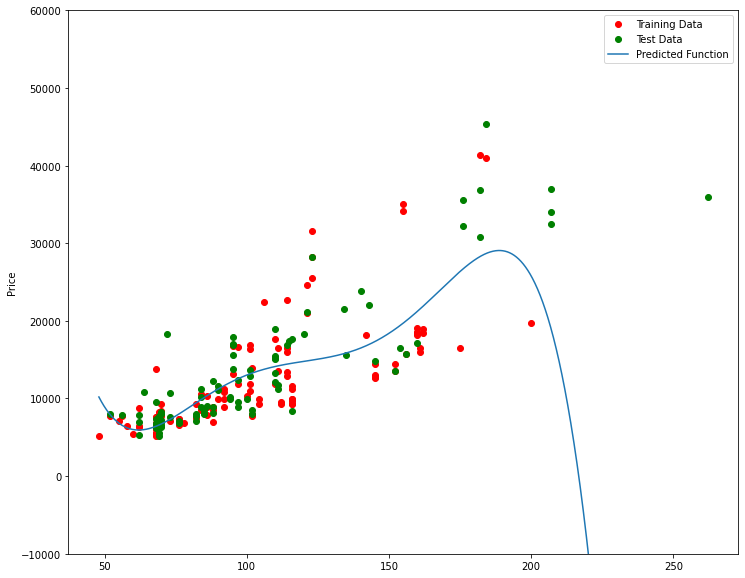

In [45]:
#PollyPlot function
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

In [46]:
#R^2 of the training data
poly.score(x_train_pr, y_train)

0.5567716899817778

In [47]:
#R^2 of the test data
poly.score(x_test_pr, y_test)

-29.871838229908324

Text(3, 0.75, 'Maximum R^2')

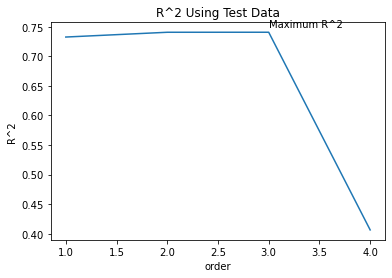

In [48]:
#Let's see how the R^2 changes on the test data for different order polynomials and then plot the results
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2')

In [49]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [50]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [51]:
# Question 4a We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.
pr1=PolynomialFeatures(degree=2)

In [53]:
# Question 4b Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [55]:
# Question 4c How many dimensions does the new feature have? Hint: use the attribute "shape".
print(x_train_pr1.shape)
print(x_test_pr1.shape)

(110, 15)
(91, 15)


In [56]:
# Question 4d Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.
poly1=LinearRegression()
poly1.fit(x_train_pr1,y_train)

LinearRegression()

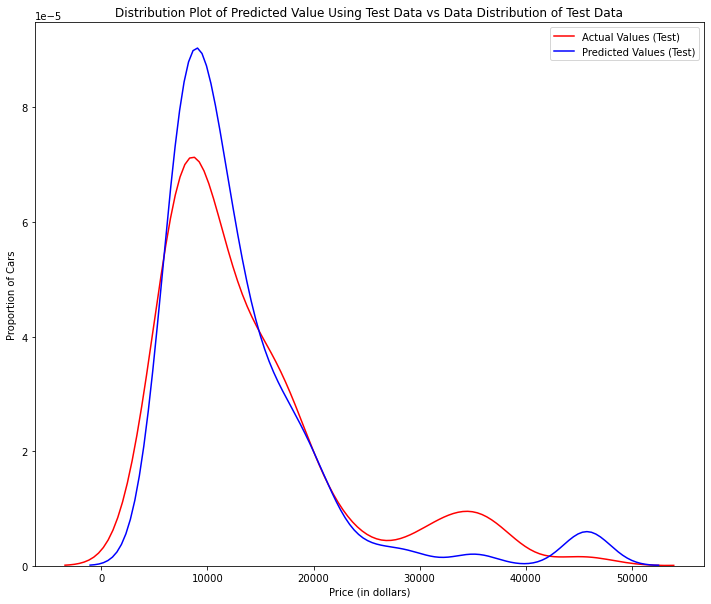

In [59]:
# Question 4e Use the method  "predict" to predict an output on the polynomial features, 
# then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.
yhat_test1=poly1.predict(x_test_pr1)
Title="Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data"
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [60]:
# Question 4f Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.
# Answer: The predicted value is higher than actual value 
# for cars where the price $10,000 range, 
# conversely the predicted price is lower 
# than the price cost in the $30,000 to $40,000 range. 
# As such the model is not as accurate in these ranges.

In [61]:
# PART 3: Ridge Regression
# In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.
# Let's perform a degree two polynomial transformation on our data.
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [62]:
#Let's import Ridge from the module linear models
from sklearn.linear_model import Ridge

In [64]:
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [65]:
yhat=RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set:', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313255]
test set: [ 6295. 10698. 13860. 13499.]


In [67]:
# We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:04<00:00, 204.42it/s, Test Score=0.564, Train Score=0.859]


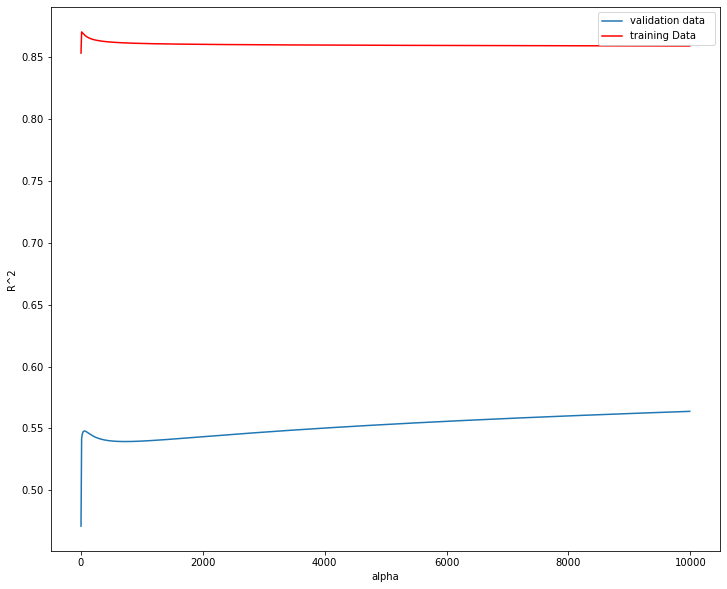

In [68]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [69]:
# Question 5 Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.
RigeModel1=Ridge(alpha=10)
RigeModel1.fit(x_train_pr,y_train)
RigeModel1.score(x_test_pr,y_test)

0.5418576440207541

In [70]:
# Part 4: Grid Search
from sklearn.model_selection import GridSearchCV
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [71]:
#Create a Ridge regression object
RR=Ridge()
RR

Ridge()

In [72]:
#Create a ridge grid search object
Grid1=GridSearchCV(RR,parameters1,cv=4,iid=None)
#In order to avoid a deprecation warning due to the iid parameter, we set the value of iid to "None"

In [73]:
#Fit the model
Grid1.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']],y_data)

C:\Users\gebruiker\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=4, estimator=Ridge(), iid=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [74]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [76]:
# Question 6
#Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters:
parameters2=[{'alpha':[0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
RR2=Ridge()
Grid2=GridSearchCV(RR2,parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
BestRR2=Grid2.best_estimator_
BestRR2

Ridge(alpha=10000)